***Histogram Equalization***

The histogram of an image shows us the distribution of grey levels in the image.

Histogram equalization is the process for increasing the contrast in an image by spreading the histogram out to be approximately uniformly distributed.

<style>
    .jp-Notebook { background: white !important; color: black !important; }
    pre, code { background: white !important; color: black !important; }
</style>

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def histogram_equalization(input_image):
  # resizing image
  img = input_image.resize((300,300), Image.Resampling.LANCZOS)
  # convert our image into a numpy array
  img = np.asarray(img)

  # put pixels in a 1D array by flattening out img array
  flat = img.flatten()

  # show the histogram
  #plt.hist(flat, bins=256)

  histogram = np.zeros(256)
  # loop through pixels and sum up counts of pixels
  for pixel in flat:
    histogram[pixel] += 1

  #plt.plot(histogram)

  a = iter(histogram)
  b = [next(a)]
  for i in a:
    b.append(b[-1] + i)

  cs = np.array(b)

  # numerator & denomenator
  nj = (cs - cs.min()) * 255
  N = cs.max() - cs.min()

  # re-normalize the cumsum
  cs = nj / N

  # cast it back to uint8 since we can't use floating point values in images
  cs = cs.astype('uint8')

  # get the value from cumulative sum for every index in flat, and set that as img_new
  img_new = cs[flat]
  
  # put array back into original shape since we flattened it
  img_new = np.reshape(img_new, img.shape)

  # set up side-by-side image display
  fig = plt.figure()
  fig.set_figheight(12)
  fig.set_figwidth(12)

  fig.add_subplot(2,2,1)
  plt.imshow(img, cmap='gray')

  #histogram of initial image
  fig.add_subplot(2,2,2)
  plt.hist(flat, bins=50)

  # display the new image
  fig.add_subplot(2,2,3)
  plt.imshow(img_new, cmap='gray')

  #histogram of final image
  fig.add_subplot(2,2,4)
  plt.hist(cs, bins=50)

  plt.show(block=True)

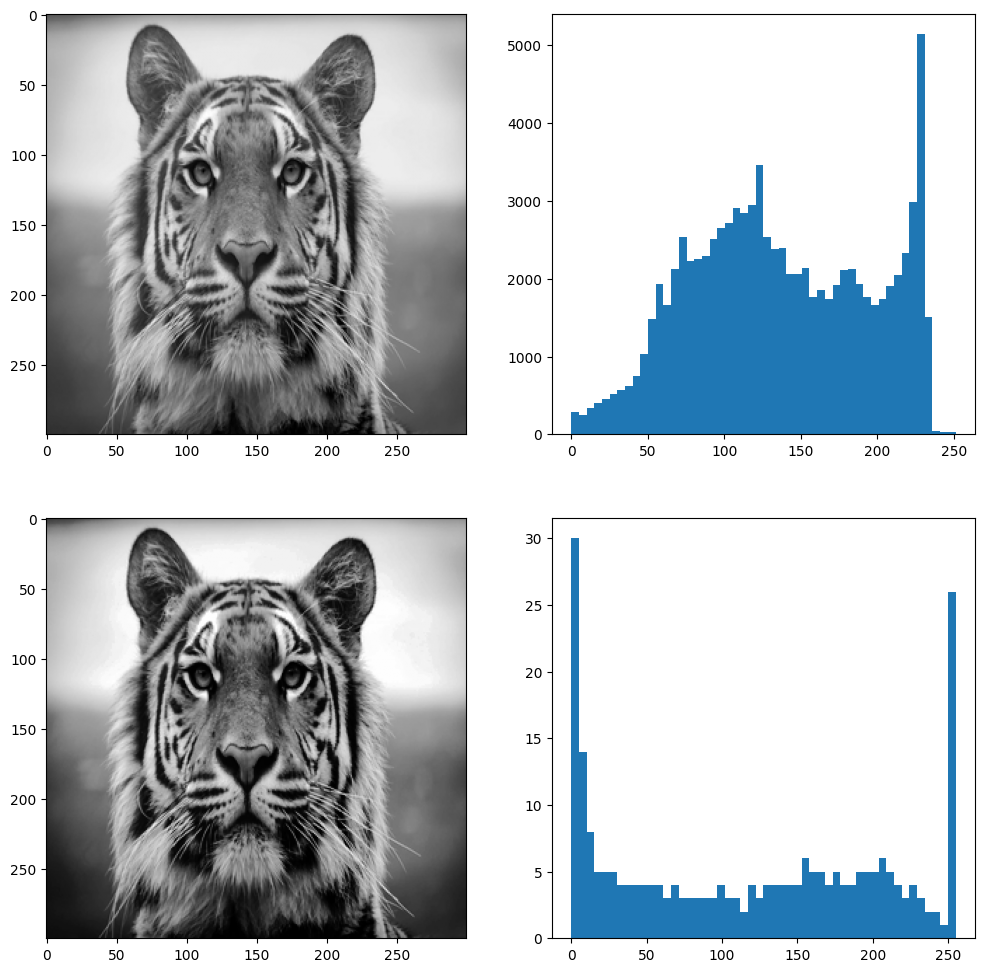

In [3]:
# reading image and converting to gray scale
img = Image.open('../images/tiger.jpg').convert('L')
#Calling the histogram equalization function
histogram_equalization(img)